<a href="https://colab.research.google.com/github/uchiharon/DataFestAfrica22_ML_Hackathon/blob/main/DataFestAfrica_ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DatafestAfrica ML Hackathon: Revamp of Lending Process

## Introduction

A fintech company that deals with loans is called Borrowme, recently have her customers having an increasing complain on the time the it take for a lending process.
As a new hired team of Data Scientist, we've been tasked by the CEO to help revamp the lending process due to this complain.
It is expected of use to help the Financial Industry predict who is likely to complete an E-process application

The IT team has provided historical data that includes applicant details and the progress of each applicant's loan application. We are required to automate the process by creating a machine learning model that can predict whether or not the credit facility process was completed electronically, or by being electronically signed.

#### Import required Libraries

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel


from sklearn.model_selection import cross_val_score

### Data Wrangling

#### Data Gathering
The IT team provided the historical data as stated in the introductory path of this lab.

The provided files are two in number and stored in `csv` formal. The IT team went futhermore to split the data in to train and test set.
DataSet provided:
- `train.csv`
- `test.csv`

In this session, we load the data set into our lab

##### Loading and Previewing the dataset

In [311]:
# import of training dataFrame
train_df = pd.read_csv("/content/drive/MyDrive/DataFest Hackaton/train.csv")

In [144]:
# Check the number of rows and columns present
train_df.shape

(12516, 21)

In [145]:
# Preview the first five columns of the dataset
train_df.head()

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   7629673   40     bi-weekly           1    3135                0   
1   5335819   33  semi-monthly           0    3590                0   
2   8492423   21        weekly           0    2303                0   
3   7948313   26     bi-weekly           0    2795                0   
4   4297036   43     bi-weekly           0    5000                0   

   years_employed  current_address_year  personal_account_m  \
0               3                     3                   6   
1               5                     2                   2   
2               5                     8                   2   
3               4                     4                   1   
4               2                     1                   1   

   personal_account_y  ...  amount_requested  risk_score  risk_score_2  \
0                   2  ...               550       36200      0.737398   
1                   8  ...              1100       53850      0.617361   
2                   7  ...               600       74850      0.677109   
3                   6  ...               800       50800      0.738055   
4                   2  ...              1100       69100      0.798303   

   risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0      0.903517      0.487712      0.515977           0.580918   
1      0.857560      0.613487      0.665523           0.744634   
2      0.758765      0.495609      0.664762           0.592556   
3      0.873204      0.666437      0.700392           0.584130   
4      0.841747      0.401971      0.568787           0.525905   

   ext_quality_score_2  inquiries_last_month  e_signed  
0             0.380918                    10         1  
1             0.744634                    12         0  
2             0.492556                     6         1  
3             0.684130                    14         1  
4             0.725905                     5         1  

[5 rows x 21 columns]

In [255]:
train_df.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'personal_account_m', 'personal_account_y',
       'has_debt', 'amount_requested', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'ext_quality_score', 'ext_quality_score_2',
       'inquiries_last_month', 'e_signed', 'new_risk_score'],
      dtype='object')

In [256]:
#X = train_df[['Entry_id', 'pay_schedule', 'home_owner', 'income',
#       'personal_account_m', 'has_debt',
#       'amount_requested', 'risk_score_2', 'risk_score_3',
#       'risk_score_4', 'risk_score_5', 'ext_quality_score',
#       'ext_quality_score_2', 'inquiries_last_month', 'age_group',
#       'amount_requested_group', 'personal_account_y_group',
#       'risk_score_group']]
X = train_df.drop(['e_signed'], axis=1)
X.head()

age pay_schedule  home_owner  income  years_employed  \
0    40    bi-weekly           1    3135               3   
4    43    bi-weekly           0    5000               2   
6    34       weekly           0    3877               5   
7    56    bi-weekly           0    3555               8   
10   61    bi-weekly           0    6110               6   

    current_address_year  personal_account_m  personal_account_y  has_debt  \
0                      3                   6                   2         1   
4                      1                   1                   2         1   
6                      2                   2                   7         1   
7                      8                   6                   2         1   
10                     5                   2                   4         0   

    amount_requested  risk_score_2  risk_score_3  risk_score_4  \
0                550      0.737398      0.903517      0.487712   
4               1100      0.798303      0.841747      0.401971   
6                800      0.802788      0.900083      0.746077   
7                900      0.640915      0.869770      0.699680   
10               900      0.739293      0.958588      0.717289   

    ext_quality_score  ext_quality_score_2  inquiries_last_month  \
0            0.580918             0.380918                    10   
4            0.525905             0.725905                     5   
6            0.807174             0.507174                    10   
7            0.752686             0.452686                    10   
10           0.495346             0.495346                     2   

    new_risk_score  
0     2.108018e-14  
4     3.030860e-15  
6     5.833750e-15  
7     3.726669e-15  
10    2.246844e-15

In [309]:
# import of test dataFrame
test_df = pd.read_csv("/content/drive/MyDrive/DataFest Hackaton/test.csv")

In [278]:
df = pd.read_csv("/content/drive/MyDrive/DataFest Hackaton/train.csv")

In [147]:
# Check the number of rows and columns present
test_df.shape

(5392, 20)

In [148]:
# Preview the first five columns of the dataset
test_df.head()

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   3560428   61        weekly           0    3180                0   
1   6934997   23        weekly           0    1540                6   
2   5682812   40     bi-weekly           0    5230                0   
3   6493191   32  semi-monthly           0    5260                3   
4   8990111   61     bi-weekly           1    3270                0   

   years_employed  current_address_year  personal_account_m  \
0               6                     3                   2   
1               0                     0                   7   
2               6                     1                   2   
3               0                     3                   1   
4               4                     0                   4   

   personal_account_y  has_debt  amount_requested  risk_score  risk_score_2  \
0                   7         1               600       30150      0.738510   
1                   1         1               450       34550      0.642993   
2                   7         1               700       42150      0.665224   
3                   4         1              1150       64050      0.652429   
4                   3         1               400       61700      0.659736   

   risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0      0.881027      0.713423      0.826402           0.730720   
1      0.766554      0.595018      0.762284           0.531712   
2      0.960832      0.767828      0.778831           0.792552   
3      0.802433      0.593816      0.560389           0.569459   
4      0.937287      0.852323      0.785698           0.632466   

   ext_quality_score_2  inquiries_last_month  
0             0.630720                     9  
1             0.531712                     7  
2             0.592552                     8  
3             0.369459                     3  
4             0.732466                     7

#### Data Assessing

##### **Preassessing**: Combine the training set and validation set make make asseserment simple and faster to carry out

In [149]:
# Preview first 5 rows
train_df.head()

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   7629673   40     bi-weekly           1    3135                0   
1   5335819   33  semi-monthly           0    3590                0   
2   8492423   21        weekly           0    2303                0   
3   7948313   26     bi-weekly           0    2795                0   
4   4297036   43     bi-weekly           0    5000                0   

   years_employed  current_address_year  personal_account_m  \
0               3                     3                   6   
1               5                     2                   2   
2               5                     8                   2   
3               4                     4                   1   
4               2                     1                   1   

   personal_account_y  ...  amount_requested  risk_score  risk_score_2  \
0                   2  ...               550       36200      0.737398   
1                   8  ...              1100       53850      0.617361   
2                   7  ...               600       74850      0.677109   
3                   6  ...               800       50800      0.738055   
4                   2  ...              1100       69100      0.798303   

   risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0      0.903517      0.487712      0.515977           0.580918   
1      0.857560      0.613487      0.665523           0.744634   
2      0.758765      0.495609      0.664762           0.592556   
3      0.873204      0.666437      0.700392           0.584130   
4      0.841747      0.401971      0.568787           0.525905   

   ext_quality_score_2  inquiries_last_month  e_signed  
0             0.380918                    10         1  
1             0.744634                    12         0  
2             0.492556                     6         1  
3             0.684130                    14         1  
4             0.725905                     5         1  

[5 rows x 21 columns]

##### **DafaFrame Assessing**

In [150]:
# Assess the numner of rows and columns in the dataFrame
train_df.shape

(12516, 21)

In [151]:
# The information on the dataFrame meta data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [152]:
# Assess data for nulls
train_df.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [153]:
# Check and count duplicated observations
train_df.duplicated().sum()

0

**Observation**: No miss value was found in the data set. The row with missing values is e_signed columns. This is attributed to the customers whose lending process is to be predicted. They are from the test dataset

In [154]:
# Get statistics summary of the numerical rows
train_df.describe()

Entry_id           age    home_owner        income  \
count  1.251600e+04  12516.000000  12516.000000  12516.000000   
mean   5.599485e+06     43.026766      0.425056   3654.110658   
std    2.563354e+06     11.865891      0.494371   1508.072163   
min    1.111398e+06     18.000000      0.000000    905.000000   
25%    3.376885e+06     34.000000      0.000000   2575.000000   
50%    5.608376e+06     42.000000      0.000000   3255.000000   
75%    7.803325e+06     51.000000      1.000000   4661.250000   
max    9.999874e+06     96.000000      1.000000   9985.000000   

       months_employed  years_employed  current_address_year  \
count     12516.000000    12516.000000          12516.000000   
mean          1.191355        3.532998              3.593161   
std           2.404529        2.265293              2.749211   
min           0.000000        0.000000              0.000000   
25%           0.000000        2.000000              2.000000   
50%           0.000000        3.000000              3.000000   
75%           1.000000        5.000000              5.000000   
max          11.000000       16.000000             12.000000   

       personal_account_m  personal_account_y      has_debt  amount_requested  \
count        12516.000000        12516.000000  12516.000000      12516.000000   
mean             3.402205            3.508469      0.795462        950.251518   
std              2.206649            1.959969      0.403380        706.915146   
min              0.000000            0.000000      0.000000        350.000000   
25%              2.000000            2.000000      1.000000        600.000000   
50%              2.000000            3.000000      1.000000        700.000000   
75%              5.000000            4.000000      1.000000       1100.000000   
max             11.000000           14.000000      1.000000      10200.000000   

         risk_score  risk_score_2  risk_score_3  risk_score_4  risk_score_5  \
count  12516.000000  12516.000000  12516.000000  12516.000000  12516.000000   
mean   61133.401246      0.690665      0.877954      0.582848      0.718456   
std    15396.809340      0.090294      0.054197      0.125260      0.121103   
min     2100.000000      0.023258      0.451371      0.016724      0.153367   
25%    49450.000000      0.641221      0.850893      0.499887      0.635005   
50%    61200.000000      0.699621      0.880993      0.588202      0.725717   
75%    72750.000000      0.752053      0.911485      0.672431      0.806576   
max    99750.000000      0.999997      0.999012      0.978932      0.993363   

       ext_quality_score  ext_quality_score_2  inquiries_last_month  \
count       12516.000000         12516.000000          12516.000000   
mean            0.621944             0.621912              6.494088   
std             0.139876             0.139623              3.731870   
min             0.010184             0.006622              1.000000   
25%             0.519794             0.519662              4.000000   
50%             0.624081             0.623781              6.000000   
75%             0.729609             0.728389              8.000000   
max             0.970249             0.966953             30.000000   

           e_signed  
count  12516.000000  
mean       0.540588  
std        0.498370  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [155]:
train_df.nunique()

Entry_id                12510
age                        72
pay_schedule                4
home_owner                  2
income                   1940
months_employed            12
years_employed             17
current_address_year       13
personal_account_m         12
personal_account_y         15
has_debt                    2
amount_requested           93
risk_score               1370
risk_score_2            12307
risk_score_3             3548
risk_score_4            12388
risk_score_5            12339
ext_quality_score       12308
ext_quality_score_2     12312
inquiries_last_month       30
e_signed                    2
dtype: int64

**Assess Each columns**

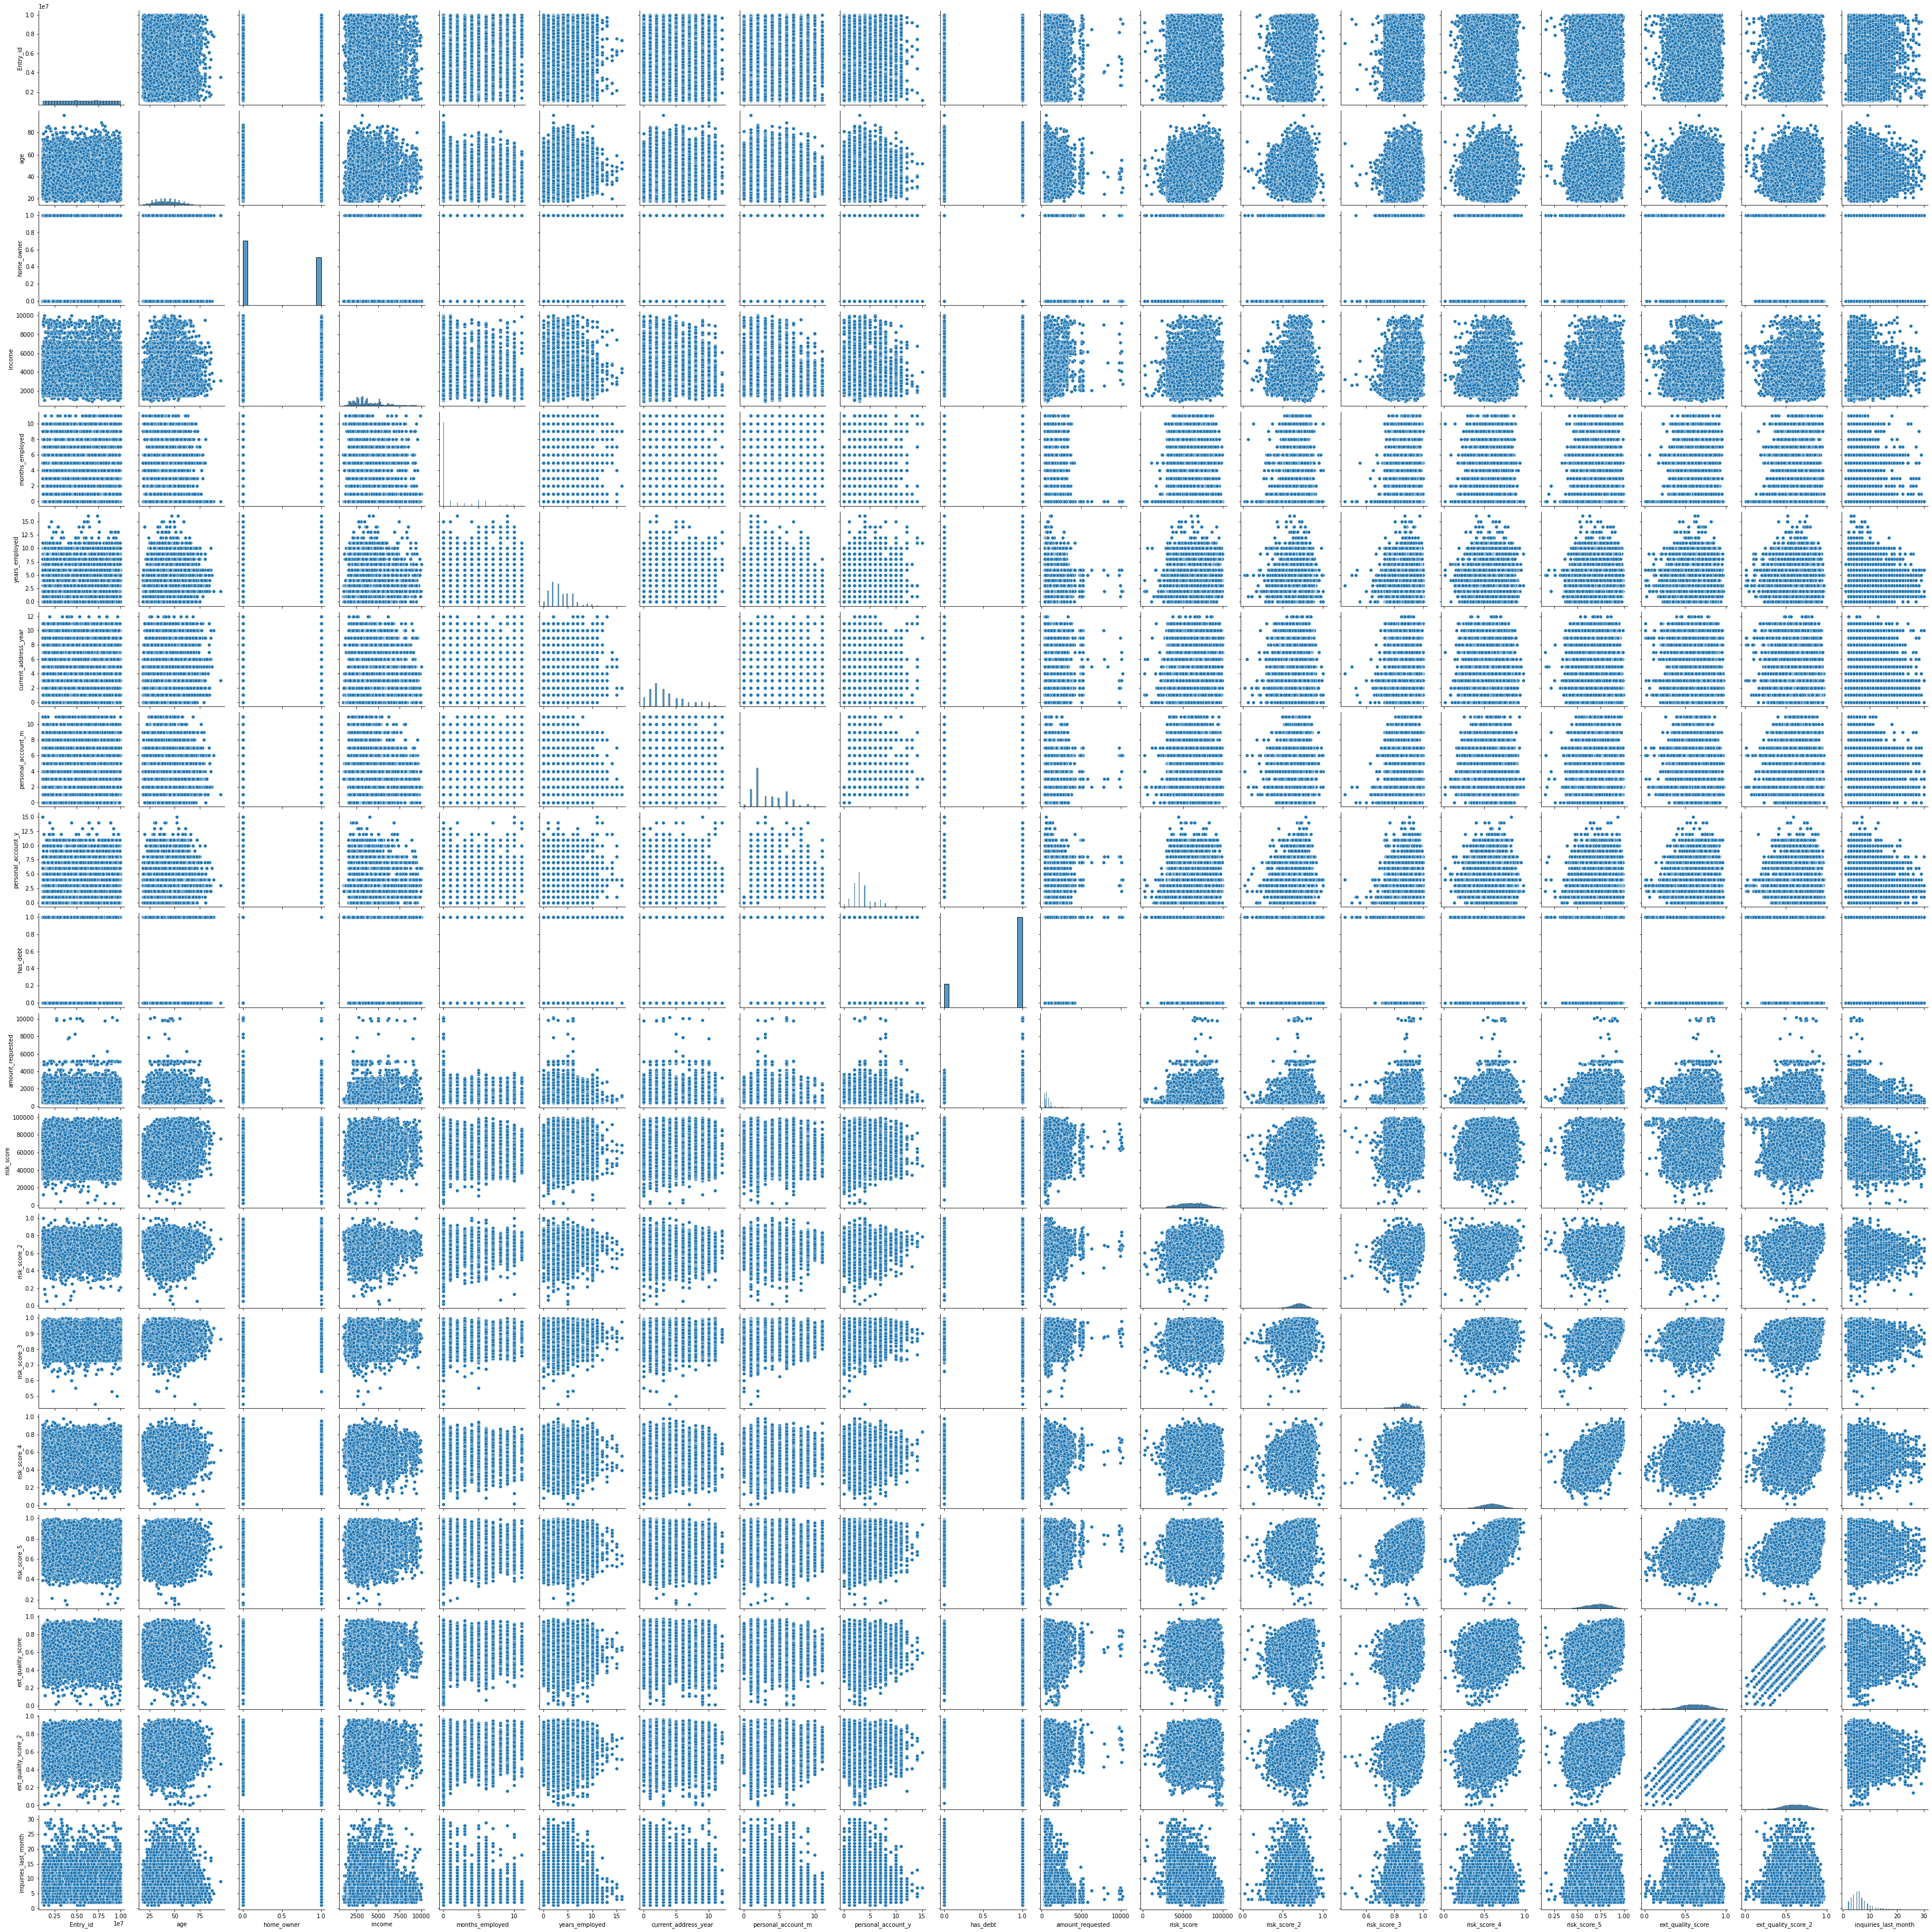

In [20]:
# Visual summary of the numberical commons
sns.pairplot(train_df[train_df.dtypes[(train_df.dtypes == float) | (train_df.dtypes == int)].index].drop('e_signed', axis=1))

In [16]:
# Assess the categorical columns
train_df['pay_schedule'].value_counts()

bi-weekly       7447
weekly          2627
semi-monthly    1388
monthly         1054
Name: pay_schedule, dtype: int64

Quality
> Data provided by the IT team is considered to be cleaned and valid for making the predictive analysis, with no trace of quality or tidyness issue. Nonetheless, columns like age, months employed, years of employment, personal_account_m would be observed closing, since the contain potential outliers. In addition to this, some of the columns may be dropped since they represent thesame entity and this would be done based on the exploratory data analysis.

In [406]:
#pay_schedule = {"bi-weekly":0,"weekly":1,"semi-monthly":2,"monthly":3}
#train_df["pay_schedule"] = train_df["pay_schedule"].map(pay_schedule)

ohe = OneHotEncoder(sparse=False)


In [407]:
column_trans = make_column_transformer(
    (ohe, ['pay_schedule']),
    remainder="passthrough"
)

In [281]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=100,
                             max_samples=0.8,
                            oob_score=True)

In [294]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier



clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = XGBClassifier()
clf5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=8, min_samples_leaf=10),n_estimators=500, random_state=1)

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('xgb', clf4),  ('ab', clf5)],
     voting='hard')

In [134]:
scaler = StandardScaler()  
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)


# best_rf_params = {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


In [421]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
best_rf_params = {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
pipe = make_pipeline(column_trans, StandardScaler(), LDA())

In [422]:
X = df.drop(['e_signed','Entry_id'], axis=1)
y = df['e_signed']

In [374]:
X = train_df.drop(['e_signed','Entry_id'], axis=1)
y = train_df['e_signed']

In [261]:
y= train_df['e_signed']
len(y)

7108

In [423]:
cross_val_score(pipe,X, y, cv=5, scoring="accuracy").mean()

0.5775379696243006

In [417]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['pay_schedule'])])),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier())])

In [181]:
pipe.predict(test_df[['age', 'income', 'amount_requested', 'risk_score', 'risk_score_2','risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score','ext_quality_score_2']])

array([0, 1, 1, ..., 0, 1, 1])

In [286]:
temp = test_df.copy()

In [418]:
temp["e_signed"] = pipe.predict(test_df.drop(['Entry_id'], axis=1))
result = temp[["Entry_id","e_signed"]]
result.head()

Entry_id  e_signed
0   3560428         0
1   6934997         1
2   5682812         0
3   6493191         1
4   8990111         0

In [419]:
result.to_csv('/content/drive/MyDrive/DataFest Hackaton/prediction.csv', index=False)

In [420]:
result['e_signed'].value_counts()/result.shape[0]

1    0.61072
0    0.38928
Name: e_signed, dtype: float64

In [59]:
test_df["pay_schedule"] = test_df["pay_schedule"].map(pay_schedule)

In [23]:
train_df.head()

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   7629673   40             0           1    3135                0   
1   5335819   33             2           0    3590                0   
2   8492423   21             1           0    2303                0   
3   7948313   26             0           0    2795                0   
4   4297036   43             0           0    5000                0   

   years_employed  current_address_year  personal_account_m  \
0               3                     3                   6   
1               5                     2                   2   
2               5                     8                   2   
3               4                     4                   1   
4               2                     1                   1   

   personal_account_y  ...  risk_score  risk_score_2  risk_score_3  \
0                   2  ...       36200      0.737398      0.903517   
1                   8  ...       53850      0.617361      0.857560   
2                   7  ...       74850      0.677109      0.758765   
3                   6  ...       50800      0.738055      0.873204   
4                   2  ...       69100      0.798303      0.841747   

   risk_score_4  risk_score_5  ext_quality_score  ext_quality_score_2  \
0      0.487712      0.515977           0.580918             0.380918   
1      0.613487      0.665523           0.744634             0.744634   
2      0.495609      0.664762           0.592556             0.492556   
3      0.666437      0.700392           0.584130             0.684130   
4      0.401971      0.568787           0.525905             0.725905   

   inquiries_last_month  e_signed   type  
0                    10       1.0  Train  
1                    12       0.0  Train  
2                     6       1.0  Train  
3                    14       1.0  Train  
4                     5       1.0  Train  

[5 rows x 22 columns]

### Expoloratory Data Analysis (EDS)

#### Univariate Analysis of the dataFrame

In [312]:
train_df.head()

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   7629673   40     bi-weekly           1    3135                0   
1   5335819   33  semi-monthly           0    3590                0   
2   8492423   21        weekly           0    2303                0   
3   7948313   26     bi-weekly           0    2795                0   
4   4297036   43     bi-weekly           0    5000                0   

   years_employed  current_address_year  personal_account_m  \
0               3                     3                   6   
1               5                     2                   2   
2               5                     8                   2   
3               4                     4                   1   
4               2                     1                   1   

   personal_account_y  ...  amount_requested  risk_score  risk_score_2  \
0                   2  ...               550       36200      0.737398   
1                   8  ...              1100       53850      0.617361   
2                   7  ...               600       74850      0.677109   
3                   6  ...               800       50800      0.738055   
4                   2  ...              1100       69100      0.798303   

   risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0      0.903517      0.487712      0.515977           0.580918   
1      0.857560      0.613487      0.665523           0.744634   
2      0.758765      0.495609      0.664762           0.592556   
3      0.873204      0.666437      0.700392           0.584130   
4      0.841747      0.401971      0.568787           0.525905   

   ext_quality_score_2  inquiries_last_month  e_signed  
0             0.380918                    10         1  
1             0.744634                    12         0  
2             0.492556                     6         1  
3             0.684130                    14         1  
4             0.725905                     5         1  

[5 rows x 21 columns]

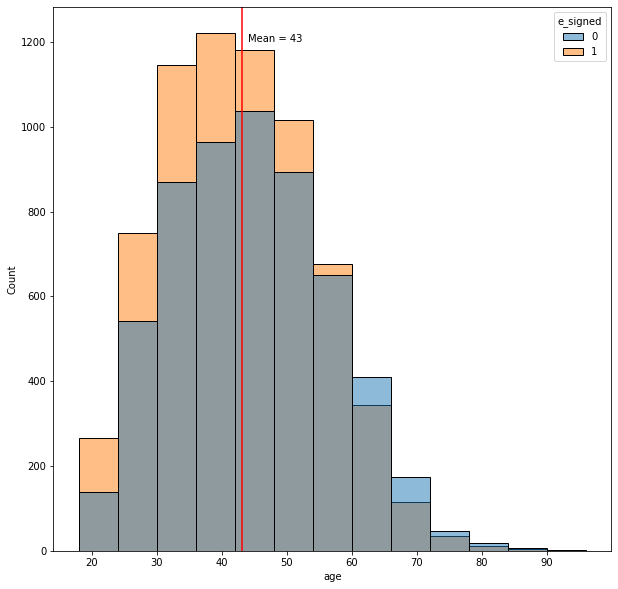

In [313]:
plt.figure(figsize=(10,10))
sns.histplot(data=train_df, x ="age", binwidth= 6, hue="e_signed")
plt.axvline(train_df["age"].mean(),c='r')
plt.text(44, 1200, "Mean = {}".format(round(train_df["age"].mean())));

In [314]:
(train_df['pay_schedule'].value_counts().index).tolist()

['bi-weekly', 'weekly', 'semi-monthly', 'monthly']

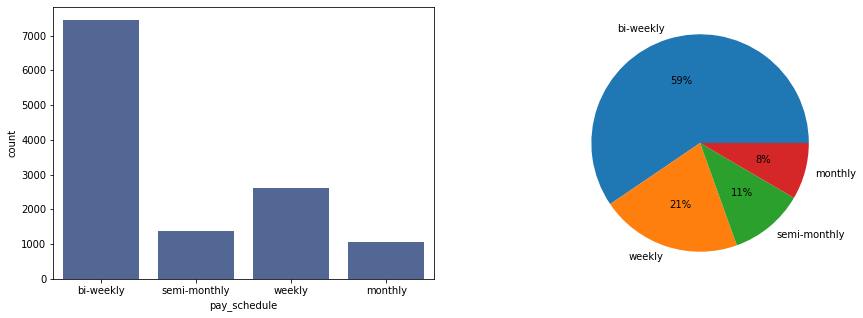

In [315]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data=train_df, x="pay_schedule", color="#4863A0")


plt.subplot(1,2,2)
plt.pie(train_df['pay_schedule'].value_counts(), labels =(train_df['pay_schedule'].value_counts().index).tolist(),  autopct='%.0f%%')
plt.show();

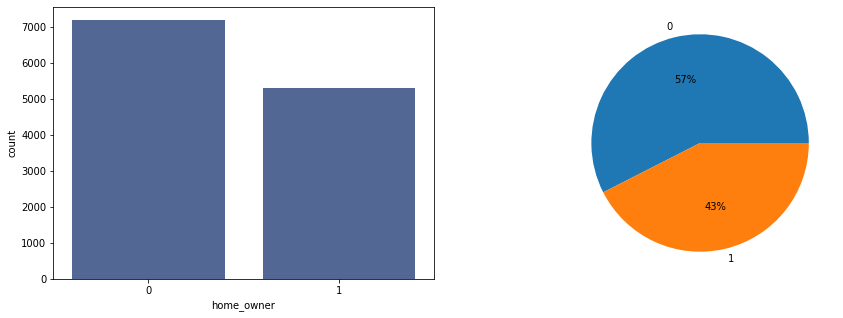

In [316]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data=train_df, x="home_owner", color="#4863A0")


plt.subplot(1,2,2)
plt.pie(train_df['home_owner'].value_counts(), labels =(train_df['home_owner'].value_counts().index).tolist(),  autopct='%.0f%%')
plt.show();

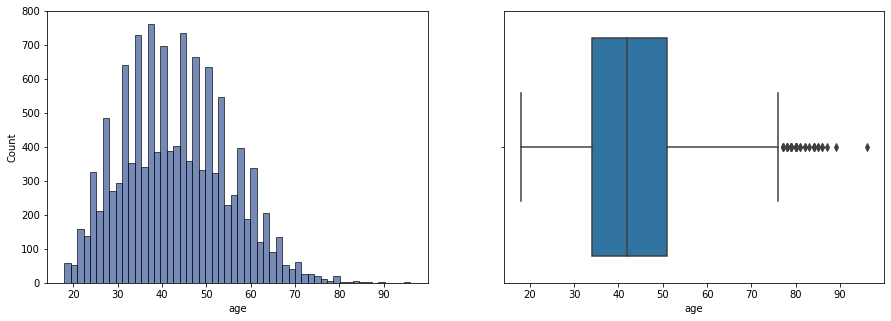

In [317]:
# Age visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="age", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='age')
plt.show();

In [318]:
train_df = train_df[train_df["age"] <= train_df["age"].quantile(0.99)]

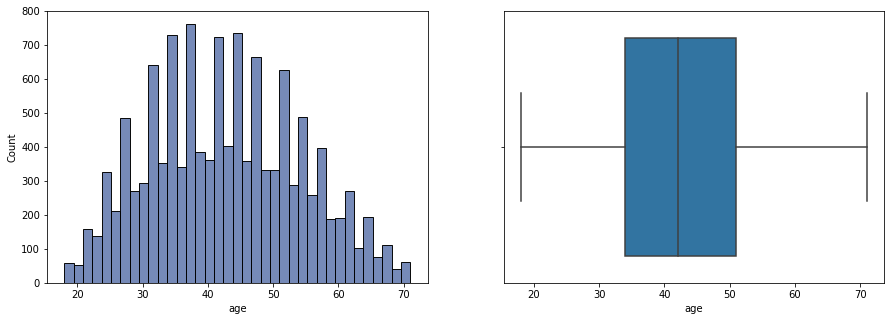

In [319]:
# Age visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="age", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='age')
plt.show();

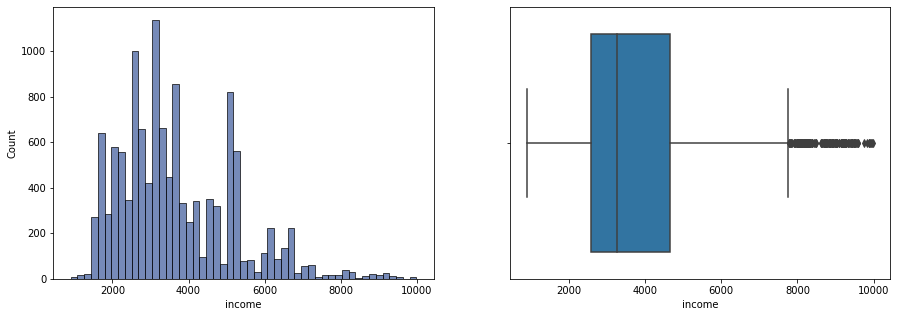

In [320]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="income", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='income')
plt.show();

In [321]:
train_df = train_df[train_df["income"] <= train_df["income"].quantile(0.98)]


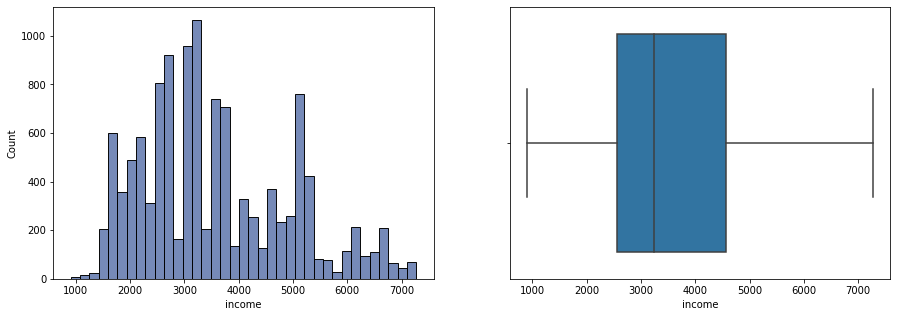

In [322]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="income", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='income')
plt.show();

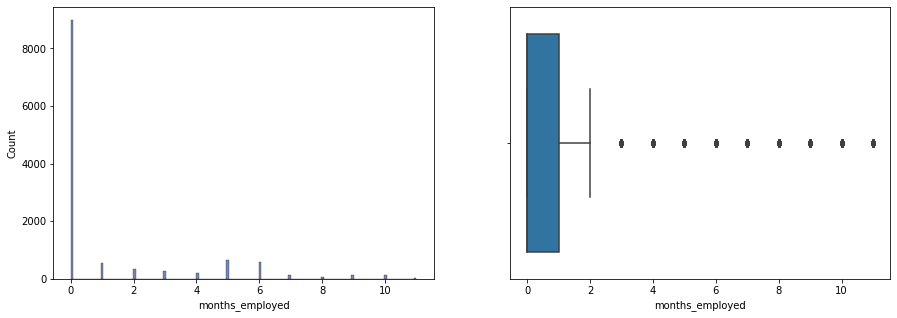

In [323]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="months_employed", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='months_employed')
plt.show();

In [324]:
train_df.drop('months_employed',axis=1, inplace=True)

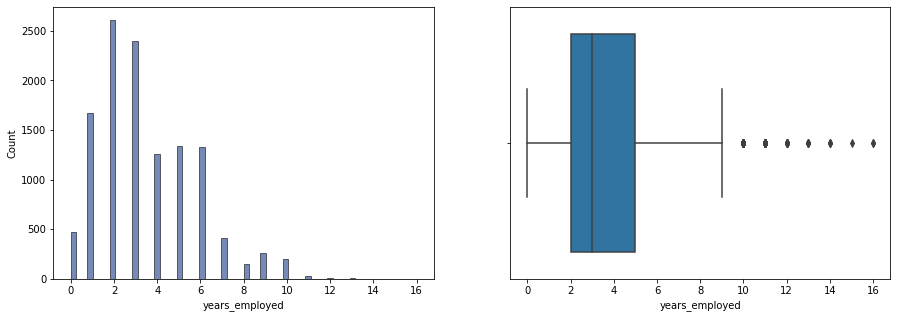

In [325]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="years_employed", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='years_employed')
plt.show();

In [326]:
train_df = train_df[train_df["years_employed"] < train_df["years_employed"].quantile(0.99)]


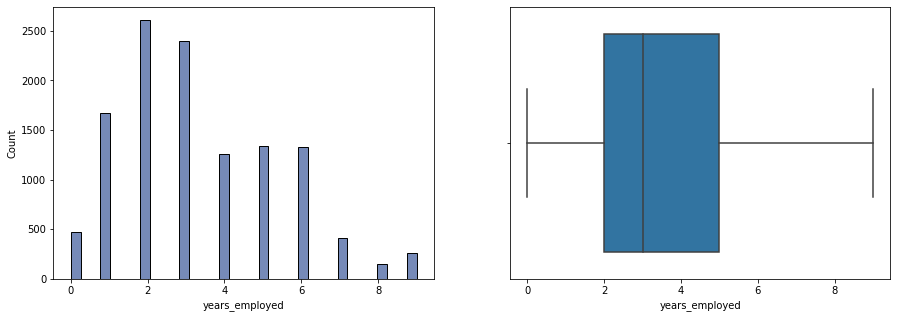

In [327]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="years_employed", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='years_employed')
plt.show();

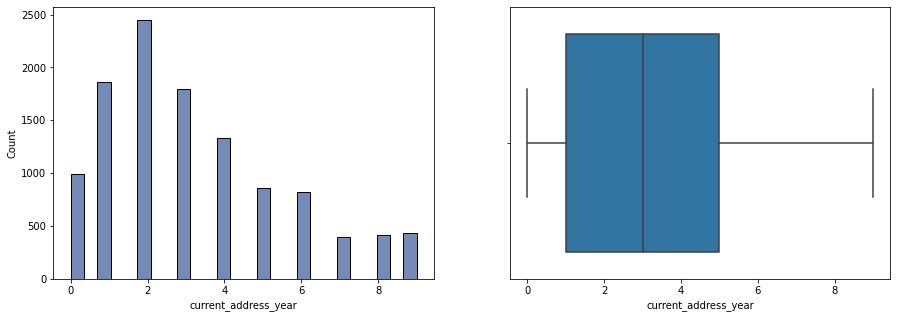

In [330]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="current_address_year", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='current_address_year')
plt.show();

In [331]:
train_df = train_df[train_df["current_address_year"] <= train_df["current_address_year"].quantile(0.95)]


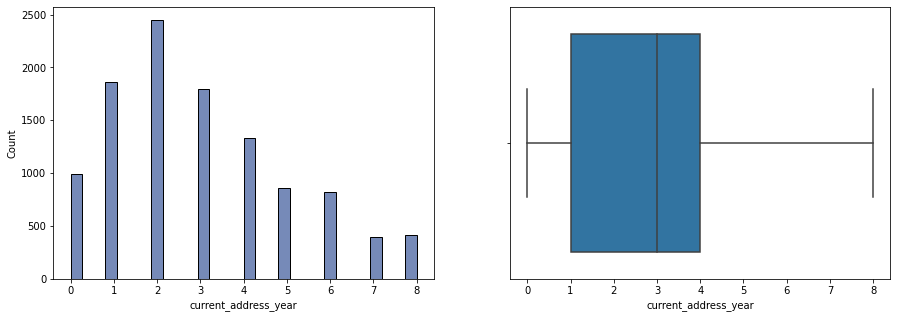

In [332]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="current_address_year", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='current_address_year')
plt.show();

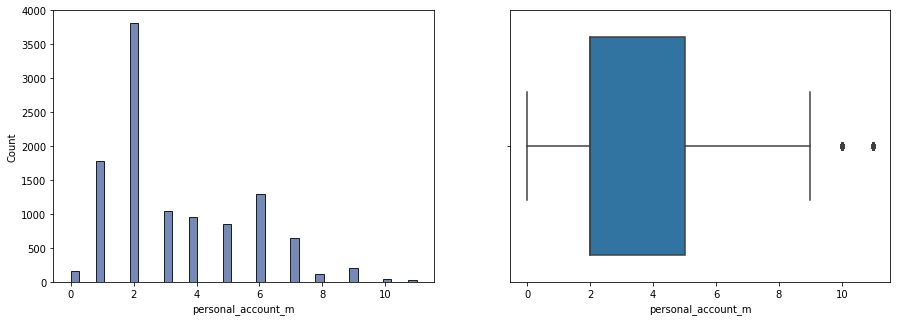

In [333]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="personal_account_m", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='personal_account_m')
plt.show();

In [334]:
train_df = train_df[train_df["personal_account_m"] <= train_df["personal_account_m"].quantile(0.975)]


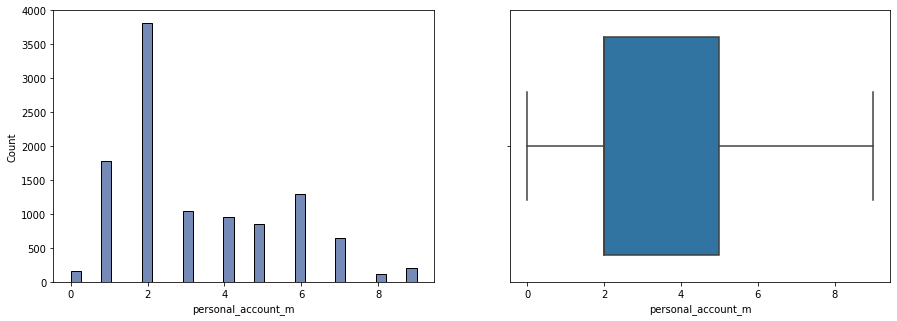

In [335]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="personal_account_m", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='personal_account_m')
plt.show();

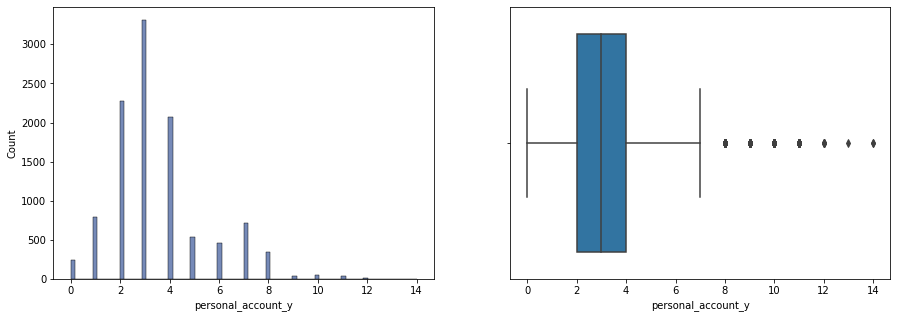

In [336]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="personal_account_y", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='personal_account_y')
plt.show();

In [337]:
train_df = train_df[train_df["personal_account_y"] <= train_df["personal_account_y"].quantile(0.95)]


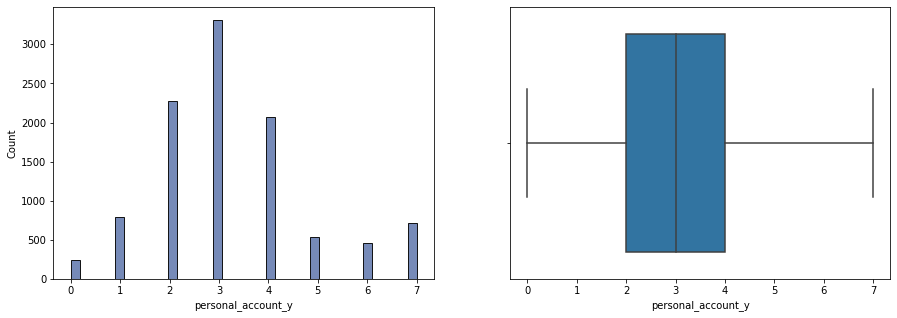

In [338]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="personal_account_y", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='personal_account_y')
plt.show();

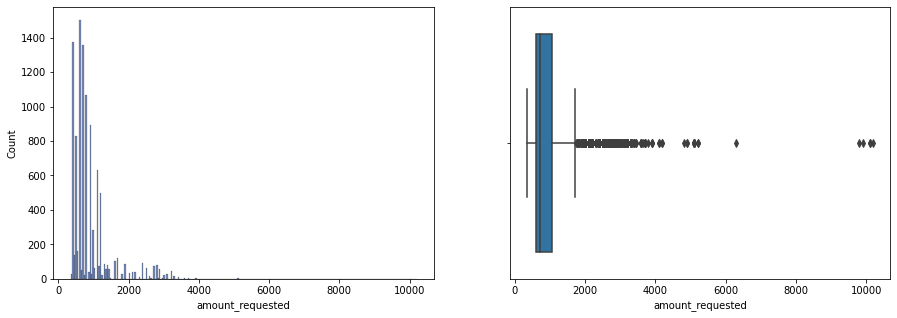

In [339]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="amount_requested", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='amount_requested')
plt.show();

In [340]:
train_df = train_df[train_df["amount_requested"] <= train_df["amount_requested"].quantile(0.89)]


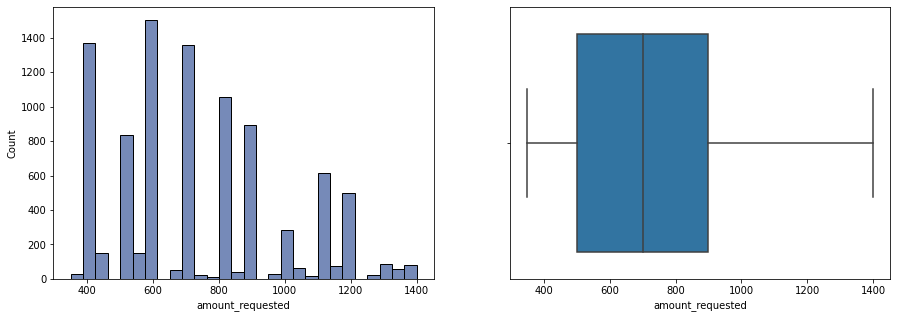

In [341]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="amount_requested", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='amount_requested')
plt.show();

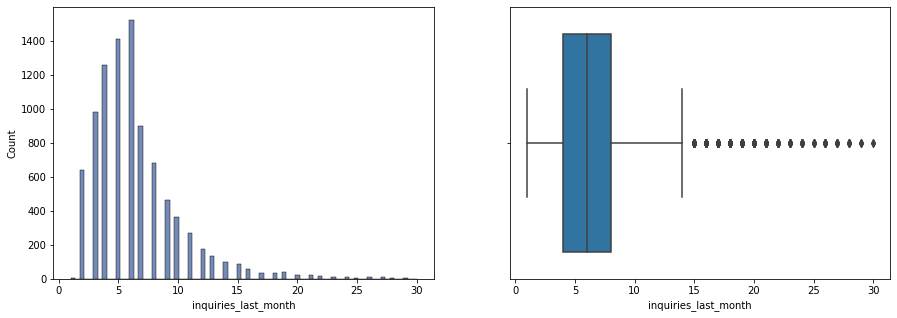

In [342]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="inquiries_last_month", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='inquiries_last_month')
plt.show();

In [343]:
train_df = train_df[train_df["inquiries_last_month"] <= train_df["inquiries_last_month"].quantile(0.9)]


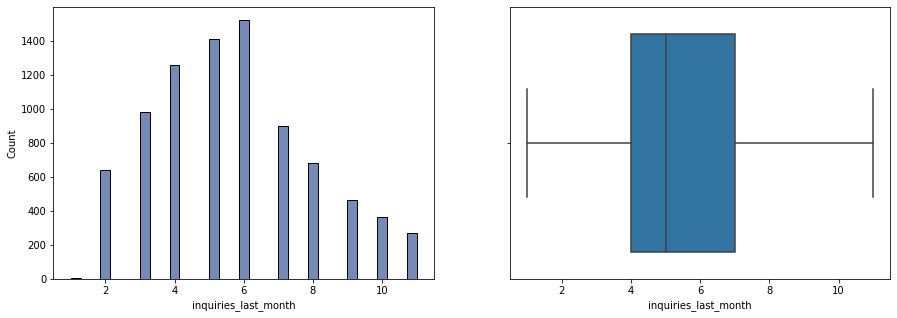

In [344]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="inquiries_last_month", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='inquiries_last_month')
plt.show();

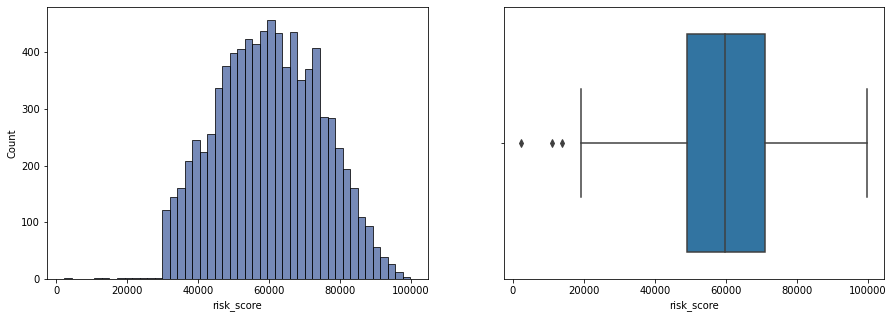

In [345]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score')
plt.show();

In [346]:
train_df = train_df[train_df["risk_score"] >= train_df["risk_score"].quantile(0.001)]


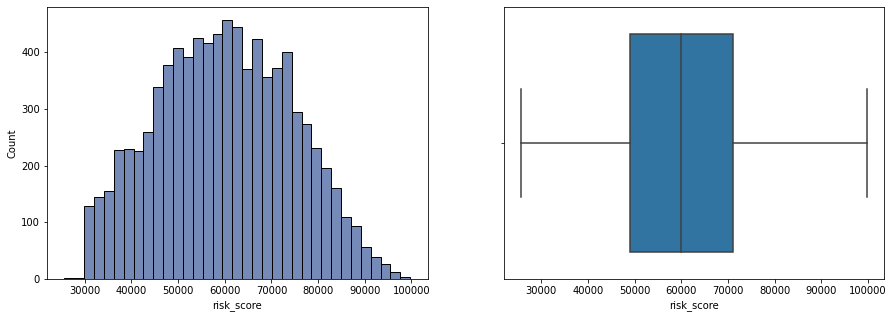

In [347]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score')
plt.show();

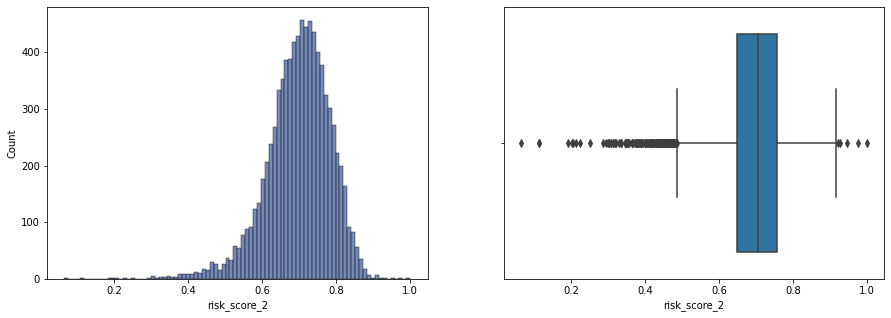

In [348]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_2", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_2')
plt.show();

In [349]:
train_df = train_df[(train_df["risk_score_2"] >= train_df["risk_score_2"].quantile(0.099)) & (train_df["risk_score_2"] <= train_df["risk_score_2"].quantile(0.995))]


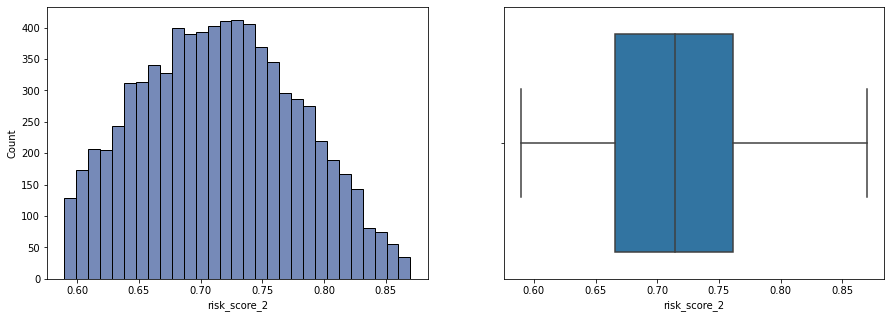

In [350]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_2", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_2')
plt.show();

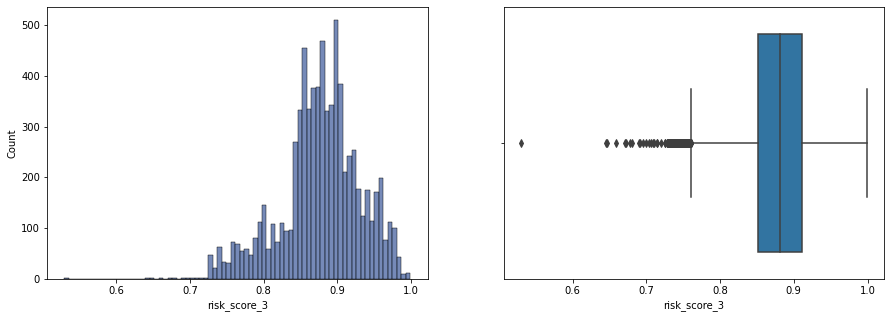

In [351]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_3", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_3')
plt.show();

In [352]:
train_df = train_df[(train_df["risk_score_3"] >= train_df["risk_score_3"].quantile(0.08)) & (train_df["risk_score_3"] <= train_df["risk_score_3"].quantile(0.995))]


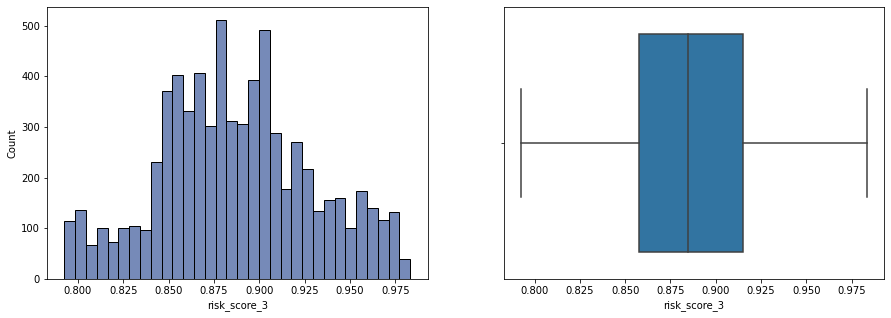

In [353]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_3", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_3')
plt.show();

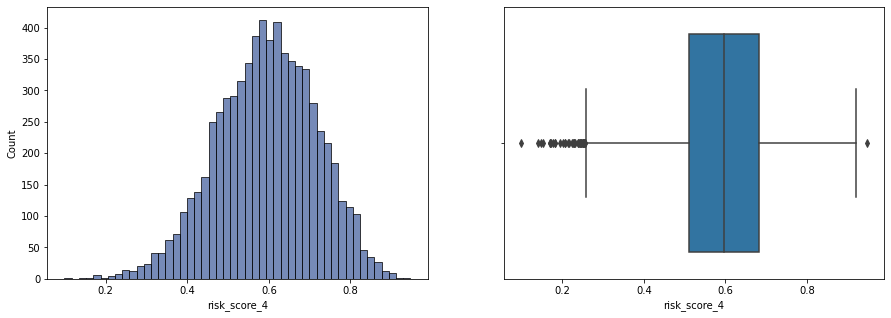

In [354]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_4", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_4')
plt.show();

In [355]:
train_df = train_df[(train_df["risk_score_4"] >= train_df["risk_score_4"].quantile(0.008)) & (train_df["risk_score_4"] <= train_df["risk_score_4"].quantile(0.999))]


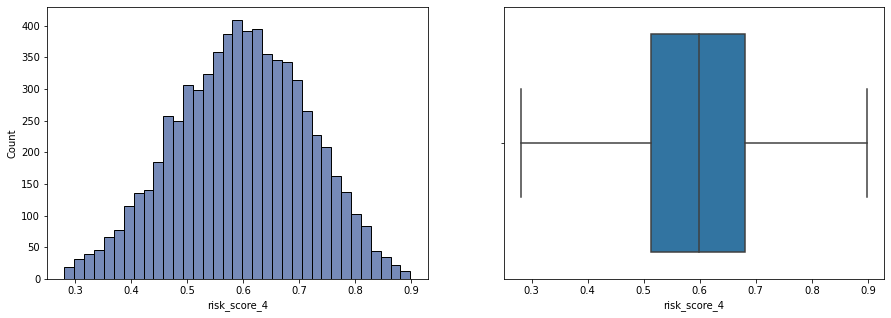

In [356]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_4", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_4')
plt.show();

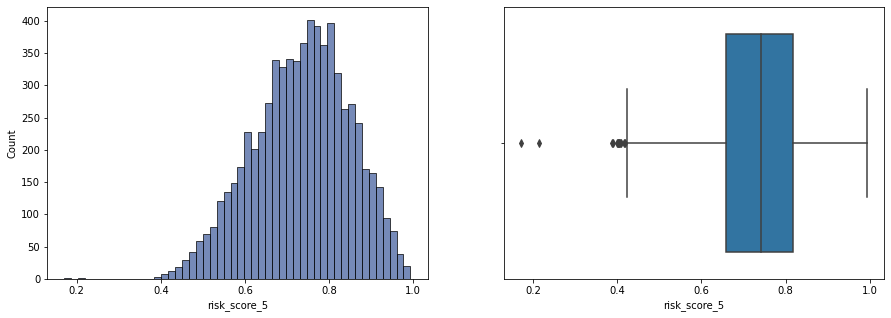

In [357]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_5", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_5')
plt.show();

In [358]:
train_df = train_df[train_df["risk_score_5"] >= train_df["risk_score_5"].quantile(0.001)]


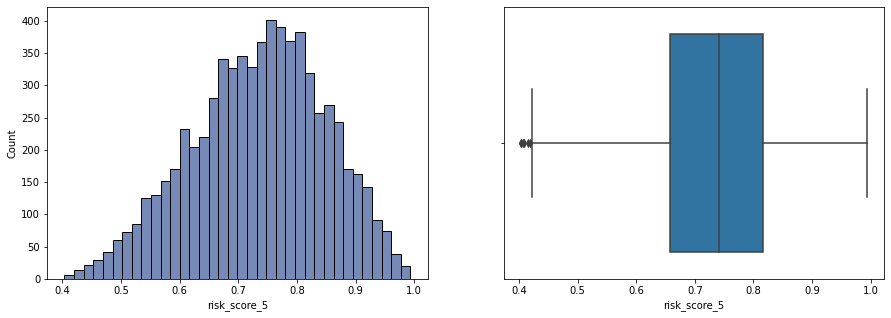

In [359]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="risk_score_5", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='risk_score_5')
plt.show();

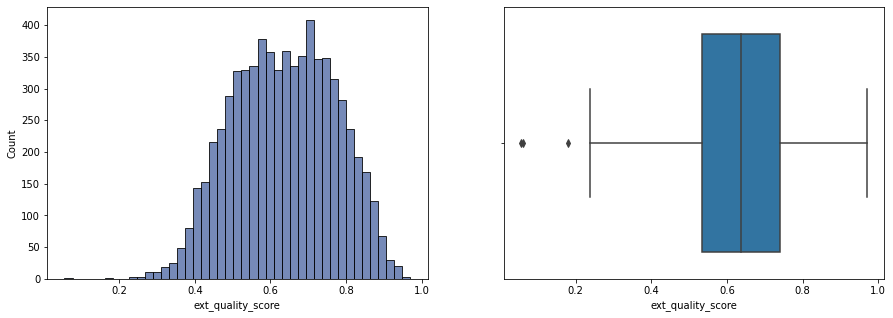

In [360]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="ext_quality_score", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='ext_quality_score')
plt.show();

In [361]:
train_df = train_df[train_df["ext_quality_score"] >= train_df["ext_quality_score"].quantile(0.001)]


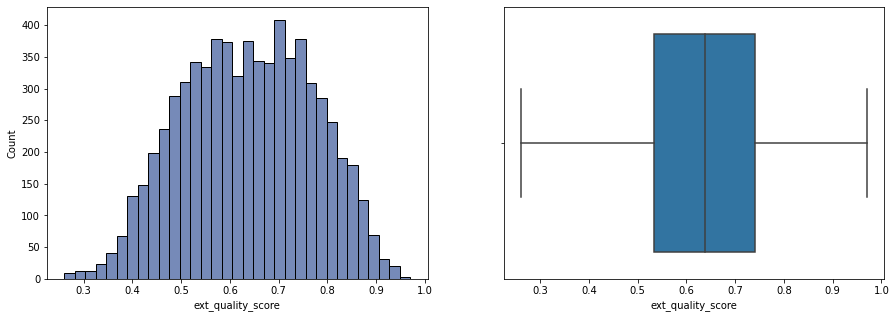

In [362]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="ext_quality_score", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='ext_quality_score')
plt.show();

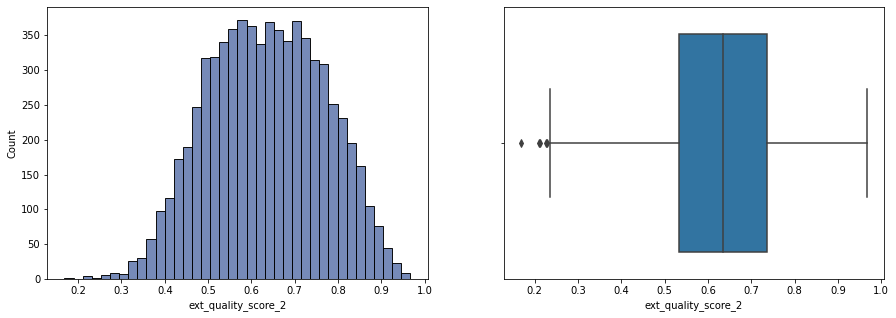

In [363]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="ext_quality_score_2", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='ext_quality_score_2')
plt.show();

In [364]:
train_df = train_df[train_df["ext_quality_score_2"] >= train_df["ext_quality_score_2"].quantile(0.001)]

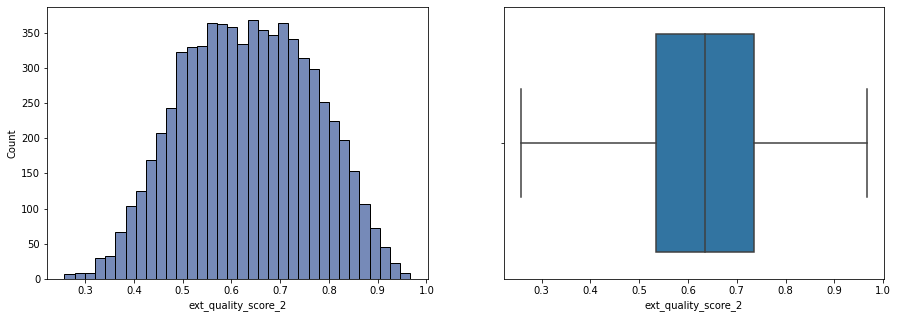

In [365]:
# Income visualization
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=train_df, x="ext_quality_score_2", color="#4863A0")


plt.subplot(1,2,2)
sns.boxplot(data=train_df, x='ext_quality_score_2')
plt.show();

In [366]:
train_df.nunique()

Entry_id                6867
age                       54
pay_schedule               4
home_owner                 2
income                  1356
years_employed            10
current_address_year       9
personal_account_m        10
personal_account_y         8
has_debt                   2
amount_requested          39
risk_score              1237
risk_score_2            6792
risk_score_3            2506
risk_score_4            6818
risk_score_5            6813
ext_quality_score       6794
ext_quality_score_2     6792
inquiries_last_month      11
e_signed                   2
dtype: int64

In [388]:
train_df = train_df[~train_df['Entry_id'].duplicated()]

In [405]:
df = df[~df['Entry_id'].duplicated()]

#### Multivariate Analysis of the dataFrame

In [218]:
old_train_df = pd.read_csv("/content/drive/MyDrive/DataFest Hackaton/train.csv")
corr = old_train_df.corr()
corr

Entry_id       age  home_owner    income  \
Entry_id              1.000000  0.001674   -0.002344 -0.013507   
age                   0.001674  1.000000    0.133687  0.173751   
home_owner           -0.002344  0.133687    1.000000  0.147731   
income               -0.013507  0.173751    0.147731  1.000000   
months_employed       0.014661 -0.101626    0.018484 -0.044470   
years_employed       -0.008881  0.181711    0.023364  0.097195   
current_address_year -0.002746  0.146980    0.177688  0.048199   
personal_account_m    0.001546 -0.009237    0.010494  0.011379   
personal_account_y   -0.011615  0.043375   -0.044700  0.001863   
has_debt              0.009282 -0.039205   -0.086891 -0.016620   
amount_requested     -0.002112  0.088569    0.039704  0.296007   
risk_score           -0.003692  0.169701    0.110235  0.176333   
risk_score_2          0.006861 -0.019758   -0.000833 -0.010499   
risk_score_3         -0.017663  0.113279    0.047717  0.062654   
risk_score_4          0.004465  0.064497   -0.147547  0.002825   
risk_score_5         -0.002202  0.099304   -0.085380  0.026979   
ext_quality_score     0.004144  0.034433    0.013117 -0.003207   
ext_quality_score_2   0.002180  0.037925    0.005813  0.000577   
inquiries_last_month -0.003409  0.046362    0.014225  0.049533   
e_signed             -0.004522 -0.084775   -0.054786  0.039160   

                      months_employed  years_employed  current_address_year  \
Entry_id                     0.014661       -0.008881             -0.002746   
age                         -0.101626        0.181711              0.146980   
home_owner                   0.018484        0.023364              0.177688   
income                      -0.044470        0.097195              0.048199   
months_employed              1.000000       -0.194144             -0.055271   
years_employed              -0.194144        1.000000              0.339631   
current_address_year        -0.055271        0.339631              1.000000   
personal_account_m           0.207739       -0.053152              0.081847   
personal_account_y          -0.023665        0.185619              0.116587   
has_debt                    -0.004871       -0.001882              0.015887   
amount_requested            -0.043417        0.094241              0.067214   
risk_score                  -0.041778        0.096123              0.086974   
risk_score_2                 0.031067       -0.060066             -0.064426   
risk_score_3                -0.032631        0.067584              0.047827   
risk_score_4                -0.013331       -0.032767             -0.157666   
risk_score_5                -0.026016       -0.006258             -0.098582   
ext_quality_score           -0.006963        0.009021              0.003250   
ext_quality_score_2         -0.000484        0.036350              0.012006   
inquiries_last_month        -0.021979        0.008185              0.015498   
e_signed                    -0.000714        0.009607             -0.016873   

                      personal_account_m  personal_account_y  has_debt  \
Entry_id                        0.001546           -0.011615  0.009282   
age                            -0.009237            0.043375 -0.039205   
home_owner                      0.010494           -0.044700 -0.086891   
income                          0.011379            0.001863 -0.016620   
months_employed                 0.207739           -0.023665 -0.004871   
years_employed                 -0.053152            0.185619 -0.001882   
current_address_year            0.081847            0.116587  0.015887   
personal_account_m              1.000000           -0.143268  0.245035   
personal_account_y             -0.143268            1.000000 -0.029645   
has_debt                        0.245035           -0.029645  1.000000   
amount_requested               -0.042454            0.051882 -0.008441   
risk_score                     -0.045303            0.013564 -0.029361   
risk_score_2 

In [250]:
corr = train_df.corr()
corr

Entry_id       age  home_owner    income  \
Entry_id              1.000000  0.001601   -0.004419 -0.022071   
age                   0.001601  1.000000    0.115230  0.155554   
home_owner           -0.004419  0.115230    1.000000  0.100808   
income               -0.022071  0.155554    0.100808  1.000000   
years_employed       -0.010792  0.153058   -0.014212  0.088940   
current_address_year  0.002493  0.105731    0.132376  0.038096   
personal_account_m   -0.002497  0.000153   -0.019001  0.018435   
personal_account_y   -0.001559  0.019699   -0.040829  0.004343   
has_debt             -0.000413 -0.041395   -0.097337 -0.037833   
amount_requested     -0.018713  0.051121    0.036020  0.139251   
risk_score           -0.015491  0.145807    0.079698  0.100393   
risk_score_2         -0.006452 -0.002555    0.011039  0.004295   
risk_score_3         -0.026527  0.130499    0.045994  0.080046   
risk_score_4          0.006700  0.092737   -0.139098 -0.000337   
risk_score_5         -0.007170  0.112296   -0.078958  0.015415   
ext_quality_score    -0.014945  0.067149    0.039405  0.008127   
ext_quality_score_2  -0.007493  0.054269    0.020794  0.010326   
inquiries_last_month -0.017464  0.004628    0.007653  0.034167   
e_signed             -0.010944 -0.116799   -0.096701 -0.047280   
new_risk_score        0.015720 -0.087688   -0.033528 -0.056802   

                      years_employed  current_address_year  \
Entry_id                   -0.010792              0.002493   
age                         0.153058              0.105731   
home_owner                 -0.014212              0.132376   
income                      0.088940              0.038096   
years_employed              1.000000              0.324171   
current_address_year        0.324171              1.000000   
personal_account_m         -0.022261              0.032938   
personal_account_y          0.179559              0.123896   
has_debt                    0.032872              0.016925   
amount_requested            0.035386              0.037860   
risk_score                  0.047100              0.054140   
risk_score_2               -0.045372             -0.019452   
risk_score_3                0.060631              0.046284   
risk_score_4               -0.013794             -0.123046   
risk_score_5               -0.006654             -0.083982   
ext_quality_score           0.038543              0.031256   
ext_quality_score_2         0.048836              0.026782   
inquiries_last_month        0.004474              0.002684   
e_signed                   -0.018487             -0.013698   
new_risk_score             -0.029702             -0.037874   

                      personal_account_m  personal_account_y  has_debt  \
Entry_id                       -0.002497           -0.001559 -0.000413   
age                             0.000153            0.019699 -0.041395   
home_owner                     -0.019001           -0.040829 -0.097337   
income                          0.018435            0.004343 -0.037833   
years_employed                 -0.022261            0.179559  0.032872   
current_address_year            0.032938            0.123896  0.016925   
personal_account_m              1.000000           -0.189838  0.258954   
personal_account_y             -0.189838            1.000000 -0.039620   
has_debt                        0.258954           -0.039620  1.000000   
amount_requested               -0.010195            0.038573  0.008123   
risk_score                     -0.034198           -0.001030 -0.033604   
risk_score_2                   -0.008097            0.012481 -0.028837   
risk_score_3                   -0.000841            0.034198 -0.005934   
risk_score_4                   -0.044749           -0.010274  0.013699   
risk_score_5                   -0.031330            0.011958  0.010523   
ext_quality_score              -0.022504            0.017608 -0.015383   
ext_quality_score_2            -0.022332            0.019930  0.001917   


In [263]:
train_df.describe()

age   home_owner       income  years_employed  \
count  7108.000000  7108.000000  7108.000000     7108.000000   
mean     42.063872     0.401519  3395.293191        3.240293   
std      11.506753     0.490240  1278.042968        1.954800   
min      18.000000     0.000000   905.000000        0.000000   
25%      33.000000     0.000000  2505.000000        2.000000   
50%      42.000000     0.000000  3165.000000        3.000000   
75%      50.000000     1.000000  4126.000000        5.000000   
max      71.000000     1.000000  7275.000000        9.000000   

       current_address_year  personal_account_m  personal_account_y  \
count           7108.000000         7108.000000         7108.000000   
mean               3.122960            3.368739            3.322313   
std                2.291926            2.120559            1.580831   
min                0.000000            0.000000            0.000000   
25%                1.000000            2.000000            2.000000   
50%                3.000000            2.000000            3.000000   
75%                4.000000            5.000000            4.000000   
max                9.000000            9.000000            7.000000   

          has_debt  amount_requested  risk_score_2  risk_score_3  \
count  7108.000000       7108.000000   7108.000000   7108.000000   
mean      0.796286        737.813731      0.716734      0.887314   
std       0.402787        255.596601      0.063731      0.042476   
min       0.000000        350.000000      0.588710      0.793455   
25%       1.000000        550.000000      0.667279      0.857526   
50%       1.000000        700.000000      0.715673      0.884539   
75%       1.000000        900.000000      0.763609      0.915809   
max       1.000000       1400.000000      0.869097      0.983267   

       risk_score_4  ext_quality_score  ext_quality_score_2  \
count   7108.000000        7108.000000          7108.000000   
mean       0.595010           0.636896             0.635236   
std        0.117432           0.133228             0.132910   
min        0.279329           0.260804             0.260804   
25%        0.512293           0.534134             0.534365   
50%        0.596940           0.637647             0.635559   
75%        0.680116           0.739936             0.736048   
max        0.897744           0.970249             0.966953   

       inquiries_last_month     e_signed  new_risk_score  
count           7108.000000  7108.000000    7.108000e+03  
mean               5.588773     0.516601    6.626582e-15  
std                2.274314     0.499759    6.156624e-15  
min                1.000000     0.000000    1.007538e-15  
25%                4.000000     0.000000    2.688977e-15  
50%                5.000000     1.000000    4.460270e-15  
75%                7.000000     1.000000    7.976048e-15  
max               11.000000     1.000000    3.759819e-14

Text(0.5, 1.0, 'correlation plot for the dataFrame')

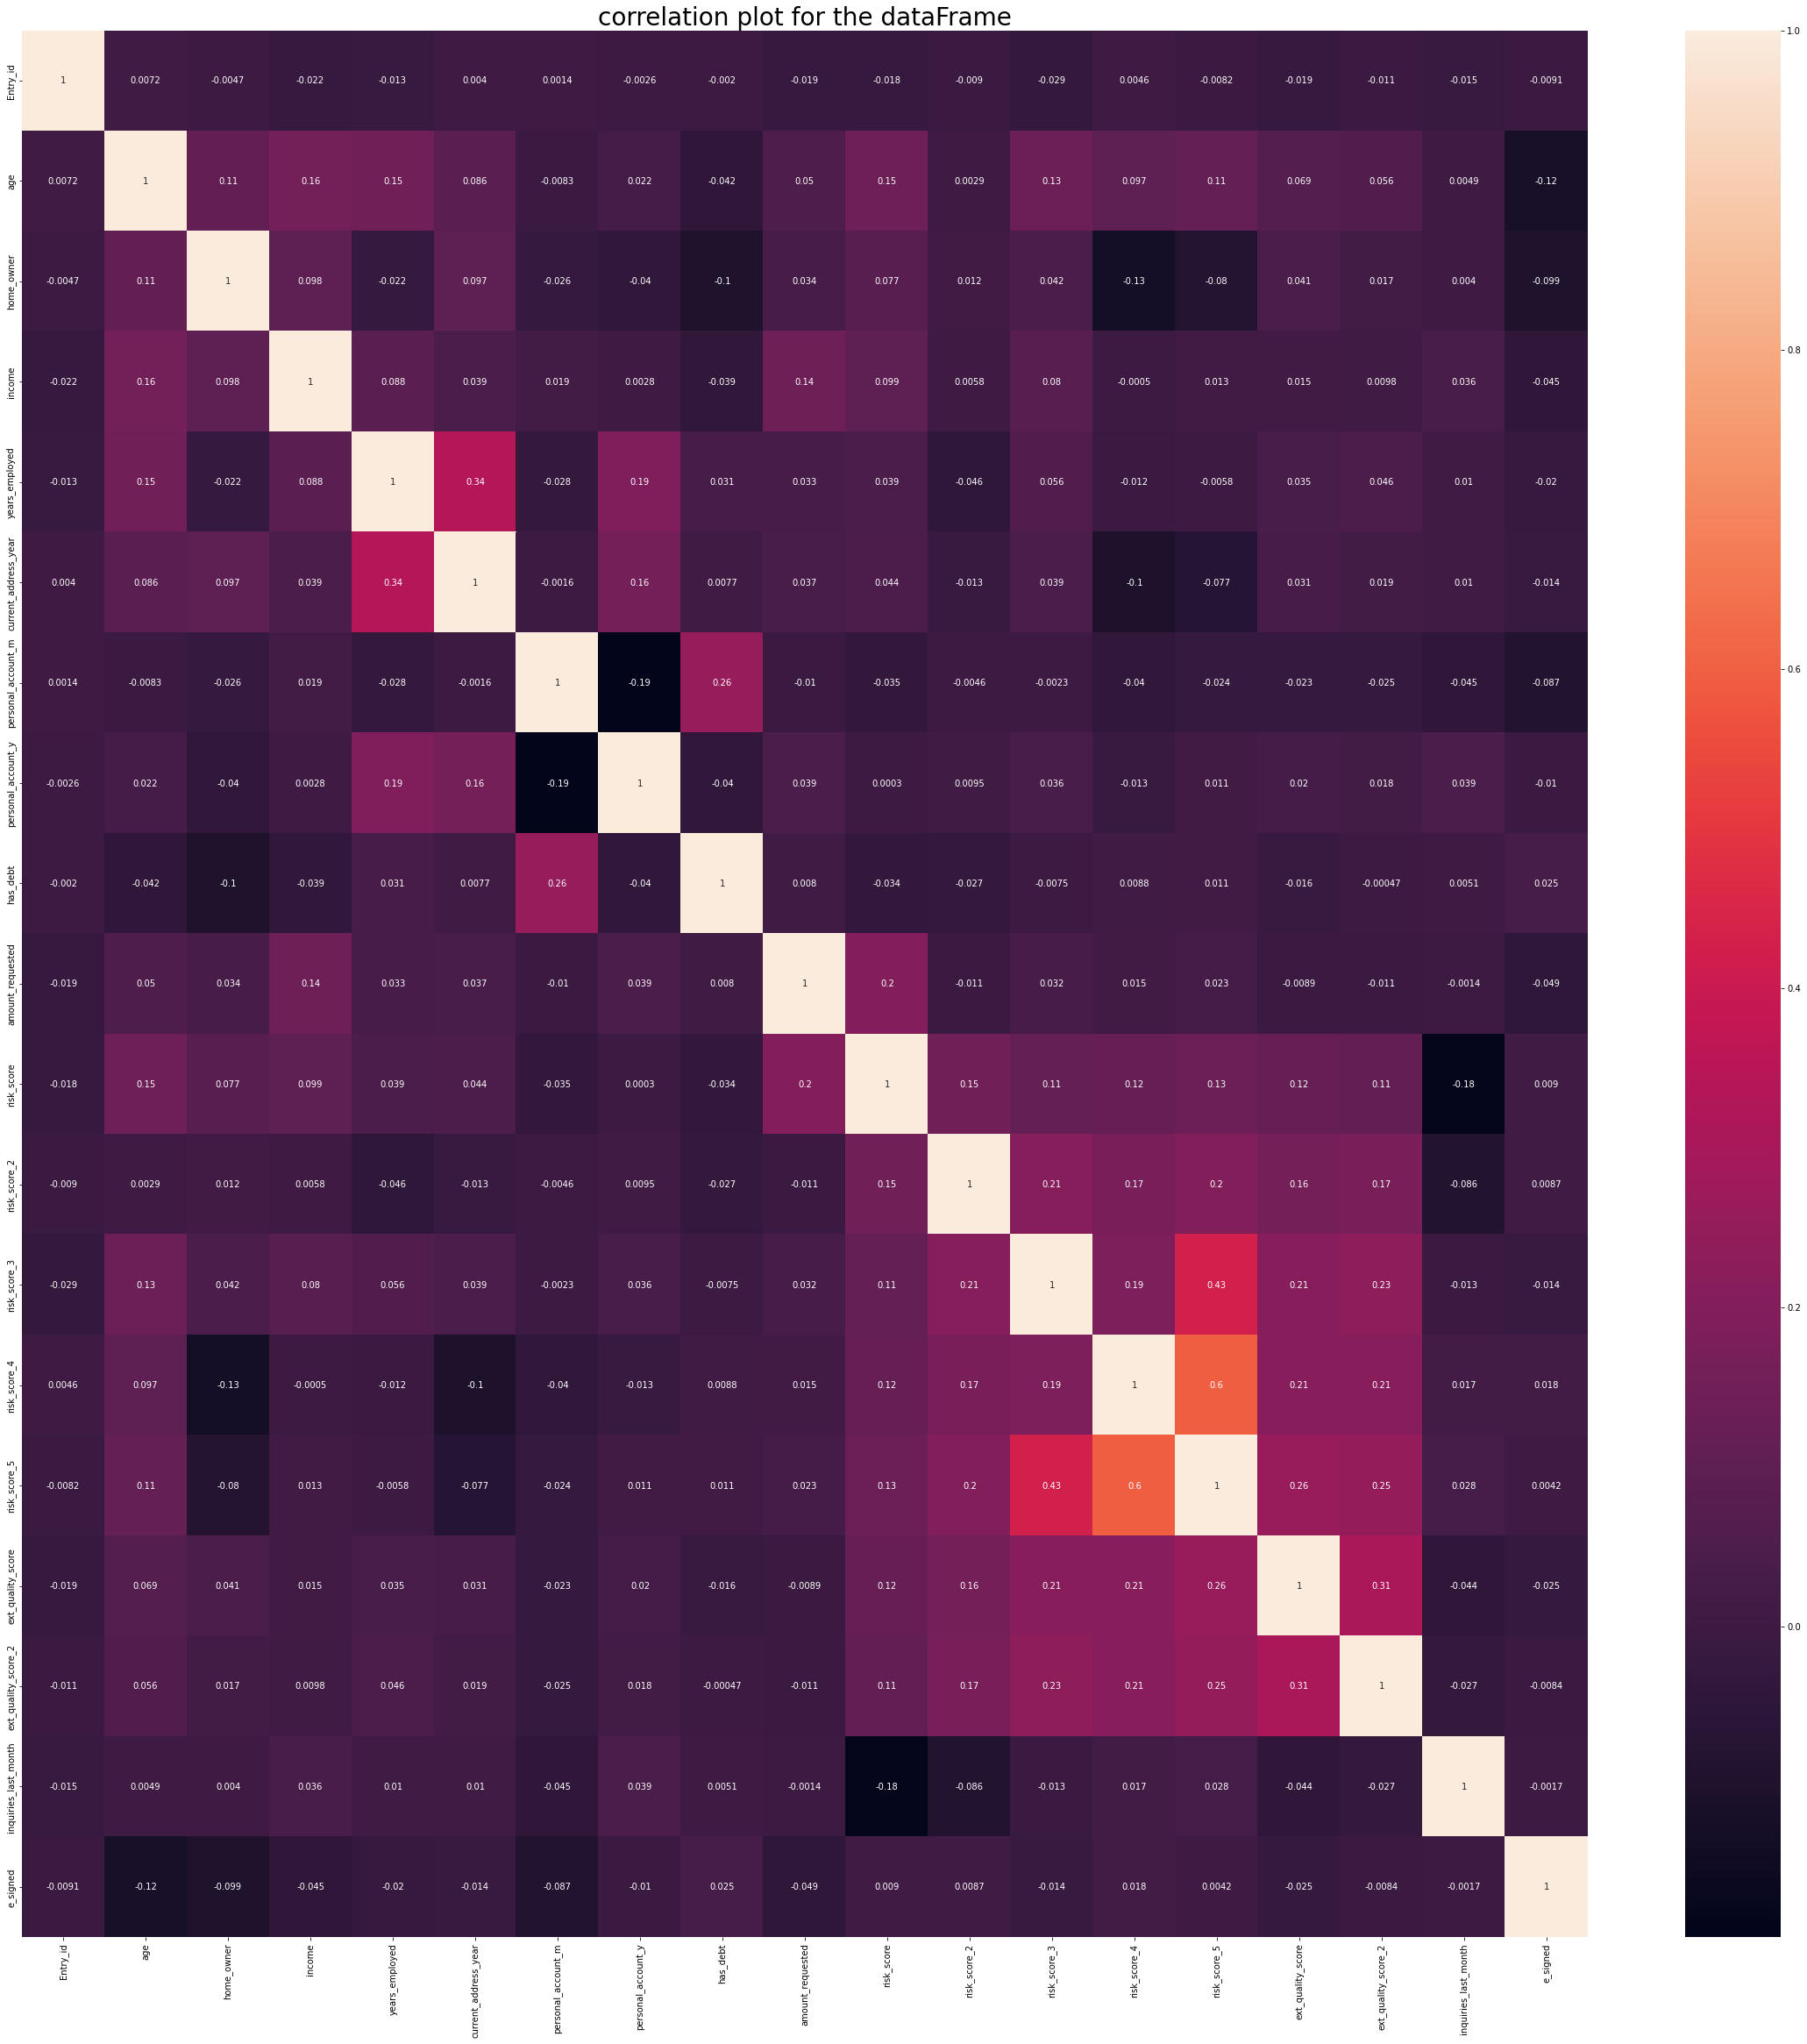

In [389]:
# correlation analysis
plt.figure(figsize=(40,40))
corr = train_df.corr()
sns.heatmap(corr,annot=True)
plt.title("correlation plot for the dataFrame",size=28)

In [252]:
train_df_copy = train_df.copy()

In [253]:
train_df.drop(['Entry_id','risk_score', 'risk_score_5'], axis=1, inplace=True)

In [ ]:
train = df[df['type'] == "Train"].drop("type", axis=1)
test = df[df['type'] == "Test"].drop(["type","e_signed"], axis=1)
train.shape, test.shape

In [187]:
bin = [0,23,43,64,100]
label = [i for i in range(4)]
train_df['age_group'] = pd.cut(train_df['age'], bin, labels = label)
train_df['age_group'] = train_df['age_group'].astype(int)
train_df['age_group'].value_counts()

1    6279
2    5329
3     504
0     404
Name: age_group, dtype: int64

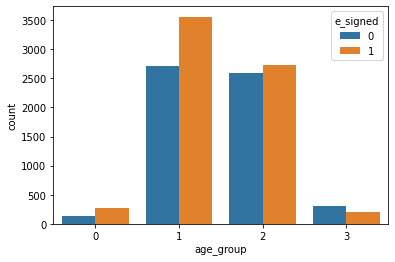

In [21]:
sns.countplot(data=train_df, x="age_group", hue="e_signed")

In [188]:
bin = [0,1000,1050,1300,10300]
label = [i for i in range(4)]
train_df['amount_requested_group'] = pd.cut(train_df['amount_requested'], bin, labels = label)
train_df['amount_requested_group'] = train_df['amount_requested_group'].astype(int)
train_df['amount_requested_group'].value_counts()

0    9119
3    1722
2    1591
1      84
Name: amount_requested_group, dtype: int64

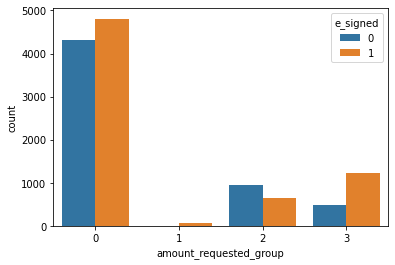

In [23]:
sns.countplot(data=train_df, x="amount_requested_group", hue="e_signed")

In [189]:
bin = [-0.99,1,12,15]
label = [i for i in range(3)]
train_df['personal_account_y_group'] = pd.cut(train_df['personal_account_y'], bin, labels = label)
train_df['personal_account_y_group'] = train_df['personal_account_y_group'].astype(int)
train_df['personal_account_y_group'].value_counts()

1    11325
0     1184
2        7
Name: personal_account_y_group, dtype: int64

In [190]:
bin = [-0.99,44450,64950,93550,100000]
label = [i for i in range(4)]
train_df['risk_score_group'] = pd.cut(train_df['risk_score'], bin, labels = label)
train_df['risk_score_group'] = train_df['risk_score_group'].astype(int)
train_df['risk_score_group'].value_counts()

1    5290
2    5124
0    1980
3     122
Name: risk_score_group, dtype: int64

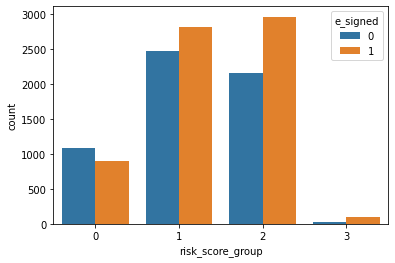

In [26]:
sns.countplot(data=train_df, x="risk_score_group", hue="e_signed")

In [191]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entry_id                  12516 non-null  int64  
 1   age                       12516 non-null  int64  
 2   pay_schedule              12516 non-null  int64  
 3   home_owner                12516 non-null  int64  
 4   income                    12516 non-null  int64  
 5   months_employed           12516 non-null  int64  
 6   years_employed            12516 non-null  int64  
 7   current_address_year      12516 non-null  int64  
 8   personal_account_m        12516 non-null  int64  
 9   personal_account_y        12516 non-null  int64  
 10  has_debt                  12516 non-null  int64  
 11  amount_requested          12516 non-null  int64  
 12  risk_score                12516 non-null  int64  
 13  risk_score_2              12516 non-null  float64
 14  risk_s

## Building the Machine Learning Model

In [55]:
pay_schedule = {"bi-weekly":0,"weekly":1,"semi-monthly":2,"monthly":3}
train_df["pay_schedule"] = train_df["pay_schedule"].map(pay_schedule)

In [61]:
from sklearn.model_selection import train_test_split

train_data = train_df.iloc[:,:19].drop('pay_schedule', axis=1)
target_data = train_df.iloc[:,19]
#train_data = train_df
#target_data = train_df['e_signed']

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.3, random_state=42)

print(f'Train data {x_train.shape}')
print(f'Train target {y_train.shape}')
print(f'Test data {x_test.shape}')
print(f'Test target {y_test.shape}')

Train data (6131, 18)
Train target (6131,)
Test data (2628, 18)
Test target (2628,)


In [167]:
# Features selection
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train.iloc[:,1:20], y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [168]:
sel.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [169]:
selected_feat= x_train.iloc[:,1:20].columns[(sel.get_support())]
len(selected_feat)

10

In [170]:
print(selected_feat)

Index(['age', 'income', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2'],
      dtype='object')


In [171]:
pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

SyntaxError: ignored

Entry_id  age pay_schedule  home_owner  income  years_employed  \
2044    5309487   51       weekly           0    1600               3   
2336    3926553   49       weekly           0    2435               6   
10756   8616656   42    bi-weekly           0    1590               4   
2708    5317614   29    bi-weekly           0    5220               4   
5564    3349280   45    bi-weekly           1    5110               5   

       current_address_year  personal_account_m  personal_account_y  has_debt  \
2044                      6                   1                   4         1   
2336                      3                   3                   5         1   
10756                     9                   3                   1         1   
2708                      4                   2                   6         1   
5564                      8                   2                   2         1   

       amount_requested  risk_score  risk_score_2  risk_score_3  risk_score_4  \
2044                400       52050      0.684225      0.827179      0.757792   
2336                600       33550      0.655376      0.869837      0.437665   
10756               600       47600      0.616147      0.802444      0.579437   
2708                800       53000      0.716299      0.859804      0.727551   
5564                700       58200      0.617583      0.833936      0.527681   

       risk_score_5  ext_quality_score  ext_quality_score_2  \
2044       0.750245           0.462965             0.462965   
2336       0.624654           0.413948             0.613948   
10756      0.424338           0.605429             0.605429   
2708       0.740020           0.586700             0.586700   
5564       0.665351           0.572920             0.672920   

       inquiries_last_month  
2044                      4  
2336                      4  
10756                     7  
2708                      9  
5564                      8

In [64]:


scaler = StandardScaler()  
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)


best_rf_params = {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
model_class = RandomForestClassifier(**best_rf_params)
cross_val_score(model_class,X_train, y_train, cv=5, scoring="accuracy").mean()


#model_class.fit(X_train, y_train)

#score = model_class.score(X_test, y_test)
#print(f"accuracy: {round(score * 100,2)}%")

0.5878295714557317

In [ ]:
for model in model_list:
    print('\n\n')
    name = model.get("name")
    model_class = model.get("class")
    model_class.fit(x_train, y_train)
    score = model_class.score(x_test, y_test)
    print(f"{name} accuracy: {round(score * 100,2)}%")
    cross_score = cross_val_score(model_class, x_test, y_test, cv=10)
    print('\n')
    print(cross_score)

In [ ]:
kernels = ['linear', 'rbf']
C = [1,5,10,20]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(),
                   {"C":C,
                    "kernel":kernels},
                   cv=5)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([ 3.71496921,  2.80232077,  7.24845119,  3.49075551, 11.37377458,
         4.33982635, 18.91320062,  5.4957438 ]),
 'std_fit_time': array([0.40866109, 0.03189155, 0.0757085 , 0.01882967, 0.21309719,
        0.27921751, 0.16649633, 0.02398505]),
 'mean_score_time': array([0.2349885 , 0.70576725, 0.23354883, 0.66596484, 0.23318305,
        0.71918449, 0.23343077, 0.63307953]),
 'std_score_time': array([0.00557116, 0.01256889, 0.00215905, 0.01179505, 0.0042783 ,
        0.11982137, 0.00424451, 0.00817485]),
 'param_C': masked_array(data=[1, 1, 5, 5, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'k

MLP Classifier accuracy: 61.04%
MLP Classifier took 4.209314584732056 seconds for training


[0.6037234  0.62234043 0.6143617  0.58244681 0.59840426 0.608
 0.59733333 0.60533333 0.58933333 0.60533333]


MLP Classifier
[[ 850  829]
 [ 634 1442]]


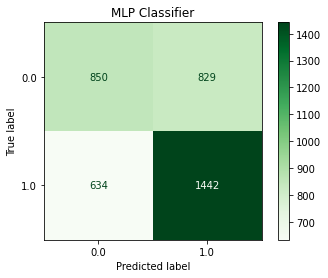

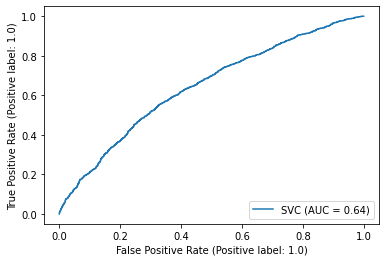

In [ ]:
 
scaler = StandardScaler()  
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test) 

name ='MLP Classifier'

start = time.time()
model_class = SVC()
model_class.fit(X_train, y_train)
time_taken = time.time() - start
score = model_class.score(X_test, y_test)
print(f"{name} accuracy: {round(score * 100,2)}%")
print(f"{name} took {time_taken} seconds for training")

cross_score = cross_val_score(model_class, X_test, y_test, cv=10)
print('\n')
print(cross_score)
print('\n')
display = ConfusionMatrixDisplay.from_estimator(
        model_class,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
    )
display.ax_.set_title(name)

print(name)
print(display.confusion_matrix)
plt.show()
    
print('\n')
svc_disp = RocCurveDisplay.from_estimator(model_class, X_test, y_test)
plt.show();

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
random_grid




{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
random_model = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_model.fit(X_train, y_train)
print(random_model.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


In [ ]:
best_rf_params = {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
model_list = [
    {
        "name": "Random Forest Classifier",
        "class": RandomForestClassifier(**best_rf_params)
    },
    {
        "name": "AdaBoost Classifier",
        "class": AdaBoostClassifier()
    },
    {
        "name": "KNeighbors Classifier",
        "class": KNeighborsClassifier(3)
    },
    {
        "name": "Decision Tree Classifier",
        "class": DecisionTreeClassifier(max_depth=10)
    },
    {
        "name": "MLP Classifier",
        "class": MLPClassifier(alpha=1, max_iter=1000)
    }
]

In [60]:
test_df['e_signed'] = model_class.predict(scaler.transform(test_df))
result = test_df[["Entry_id","e_signed"]]
result.head()

Entry_id  e_signed
0   3560428         0
1   6934997         1
2   5682812         1
3   6493191         1
4   8990111         0

In [61]:
result.to_csv('/content/drive/MyDrive/DataFest Hackaton/prediction.csv', index=False)

In [ ]:
result["e_signed"].sum()

2972.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,X_test)

NameError: ignored

Resul

Guassian Naive Base:

SVM SVC:  {'C': 1, 'kernel': 'rbf'}: 0.61271467